<a href="https://colab.research.google.com/github/OluomaOji/easy_labor_prediction_project_with_ml/blob/main/EDA_princesse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')



In [ ]:

# Read the CSV file
df = pd.read_csv('olfc-data.csv')

# Display the first few rows to verify the data was loaded correctly
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# Data Cleaning

Handle missing values, remove duplicates, and standardize formats.

In [ ]:
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# Data Exploratory Analysis

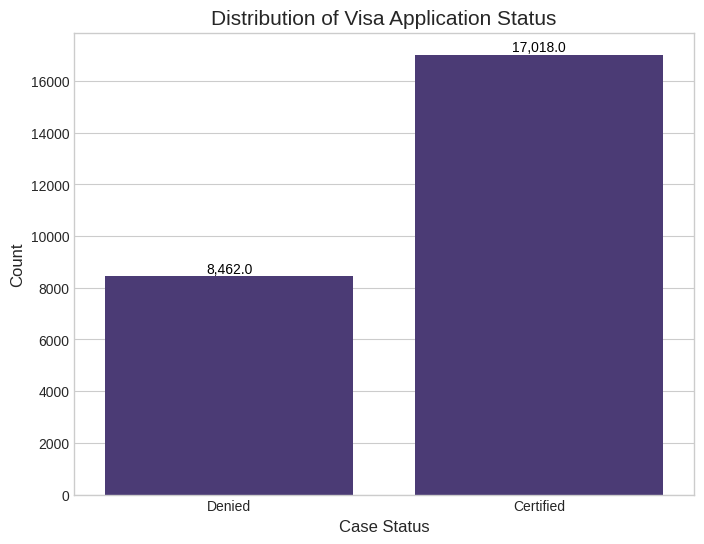

In [ ]:
# Create years_of_estab feature
df['years_of_estab'] = 2016 - df['yr_of_estab']

# Set a consistent style for all plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (8, 6)

# . Case Status Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='case_status', data=df)
plt.title('Distribution of Visa Application Status', fontsize=15)
plt.xlabel('Case Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.savefig('case_status_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

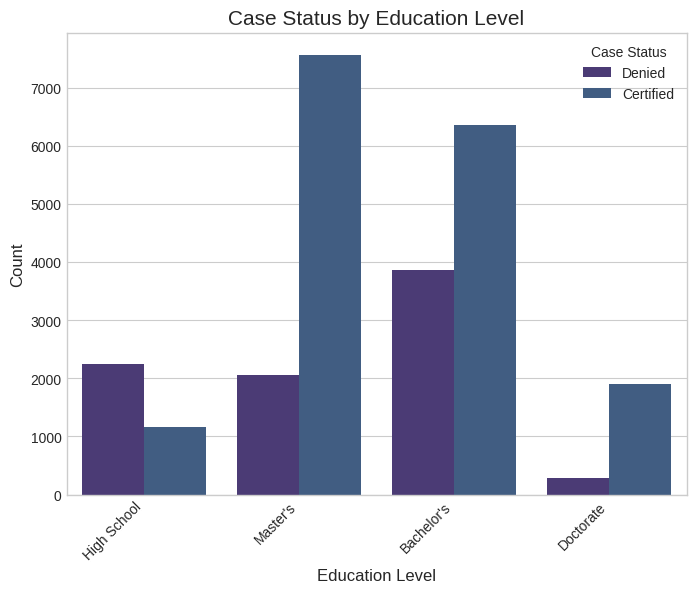

In [ ]:
#  Education Level vs Case Status
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='education_of_employee', hue='case_status', data=df)
plt.title('Case Status by Education Level', fontsize=15)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Case Status')
plt.savefig('education_vs_case_status.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 800x600 with 0 Axes>

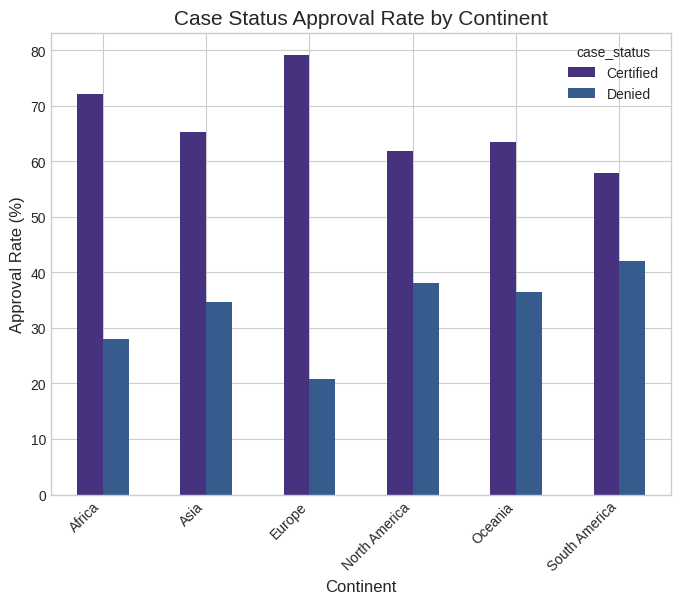

In [ ]:
# Continent vs Case Status
plt.figure(figsize=(8, 6))
continent_status = pd.crosstab(df['continent'], df['case_status'])
continent_status_pct = continent_status.div(continent_status.sum(axis=1), axis=0) * 100
ax = continent_status_pct.plot(kind='bar', stacked=False)
plt.title('Case Status Approval Rate by Continent', fontsize=15)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Approval Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig('continent_vs_case_status.png', dpi=300, bbox_inches='tight')
plt.show()

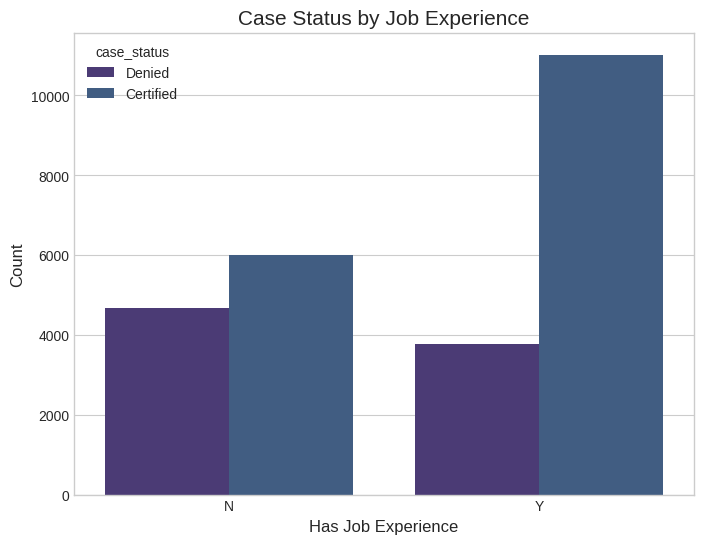

In [ ]:
#  Job Experience vs Case Status
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='has_job_experience', hue='case_status', data=df)
plt.title('Case Status by Job Experience', fontsize=15)
plt.xlabel('Has Job Experience', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('job_experience_vs_case_status.png', dpi=300, bbox_inches='tight')
plt.show()

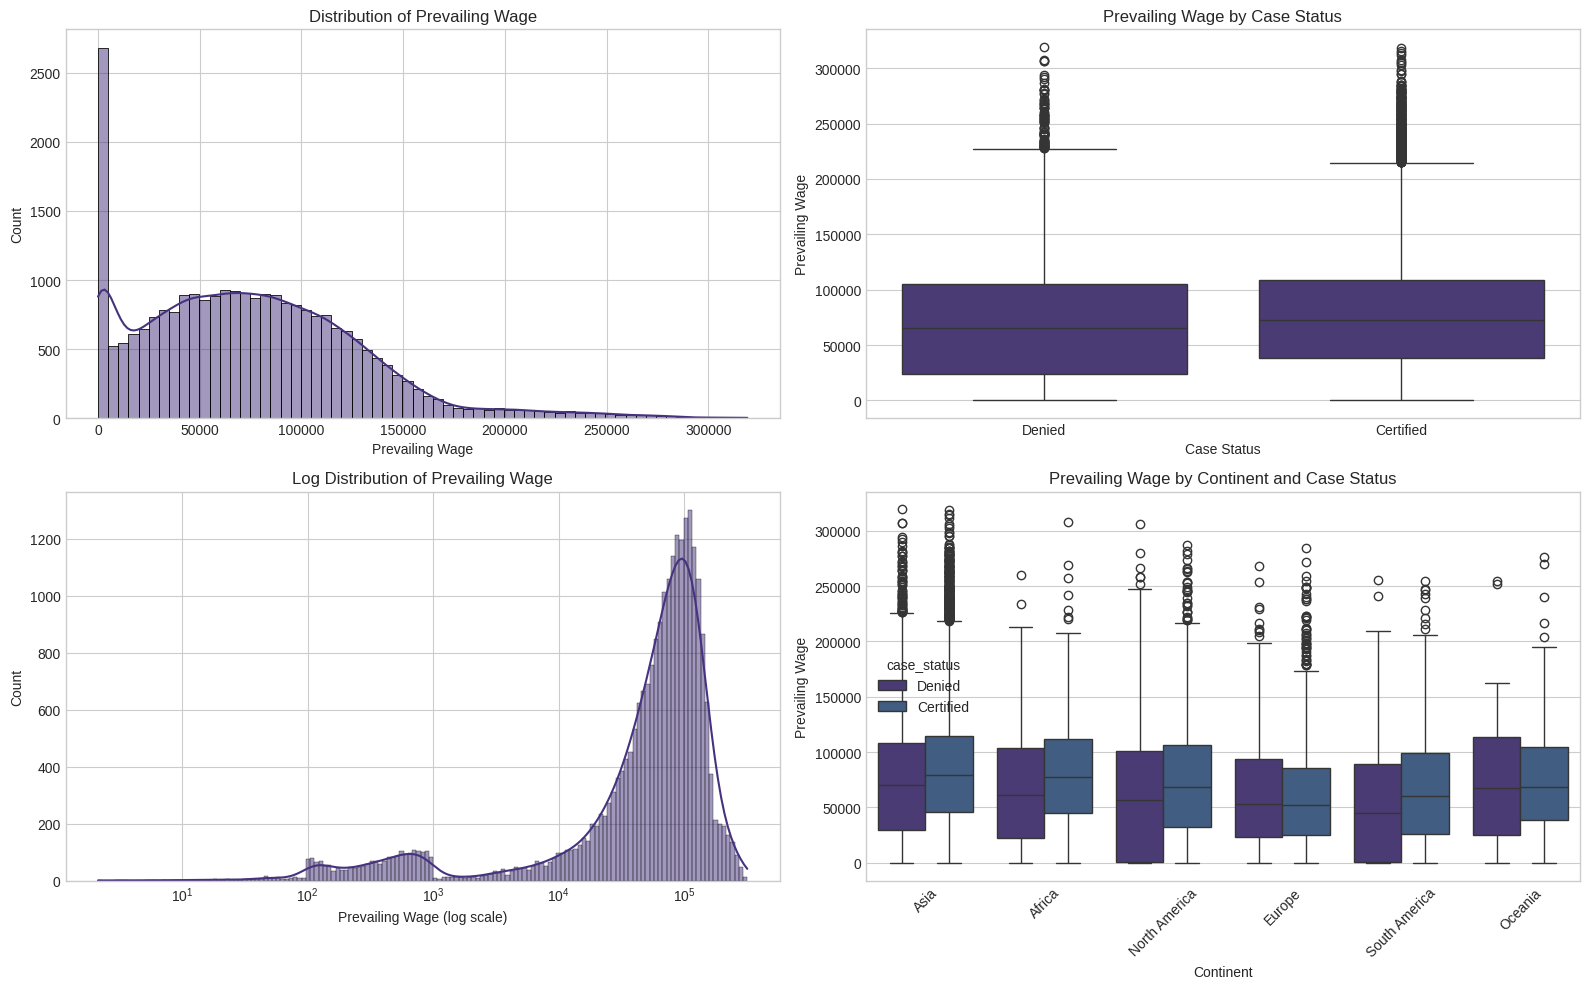

In [ ]:
# 5. Prevailing Wage Distribution and Analysis
plt.figure(figsize=(16, 10))
gs = GridSpec(2, 2)

# Histogram of wages
ax0 = plt.subplot(gs[0, 0])
sns.histplot(data=df, x='prevailing_wage', kde=True, ax=ax0)
ax0.set_title('Distribution of Prevailing Wage', fontsize=12)
ax0.set_xlabel('Prevailing Wage', fontsize=10)

# Boxplot of wages by case status
ax1 = plt.subplot(gs[0, 1])
sns.boxplot(x='case_status', y='prevailing_wage', data=df, ax=ax1)
ax1.set_title('Prevailing Wage by Case Status', fontsize=12)
ax1.set_xlabel('Case Status', fontsize=10)
ax1.set_ylabel('Prevailing Wage', fontsize=10)

# Log-transformed wage distribution
ax2 = plt.subplot(gs[1, 0])
sns.histplot(data=df, x='prevailing_wage', kde=True, log_scale=True, ax=ax2)
ax2.set_title('Log Distribution of Prevailing Wage', fontsize=12)
ax2.set_xlabel('Prevailing Wage (log scale)', fontsize=10)

# Wage by continent and case status
ax3 = plt.subplot(gs[1, 1])
sns.boxplot(x='continent', y='prevailing_wage', hue='case_status', data=df, ax=ax3)
ax3.set_title('Prevailing Wage by Continent and Case Status', fontsize=12)
ax3.set_xlabel('Continent', fontsize=10)
ax3.set_ylabel('Prevailing Wage', fontsize=10)
ax3.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('wage_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

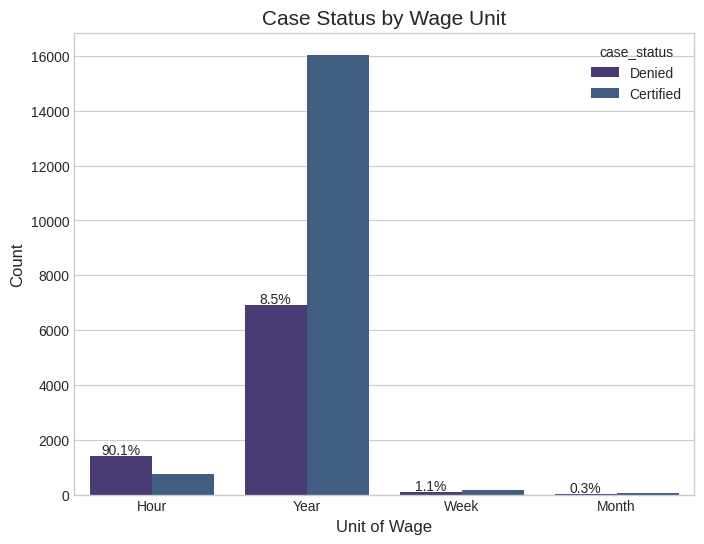

In [ ]:
# . Unit of Wage Analysis
plt.figure(figsize=(8, 6))
unit_counts = df['unit_of_wage'].value_counts()
unit_percentages = unit_counts / len(df) * 100
ax = sns.countplot(x='unit_of_wage', hue='case_status', data=df)
plt.title('Case Status by Wage Unit', fontsize=15)
plt.xlabel('Unit of Wage', fontsize=12)
plt.ylabel('Count', fontsize=12)
for i, p in enumerate(ax.patches[:len(unit_counts)]):
    ax.text(p.get_x() + p.get_width()/2.,
            p.get_height() + 50,
            f'{unit_percentages.iloc[i]:.1f}%',
            fontsize=10, ha='center')
plt.savefig('wage_unit_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 800x600 with 0 Axes>

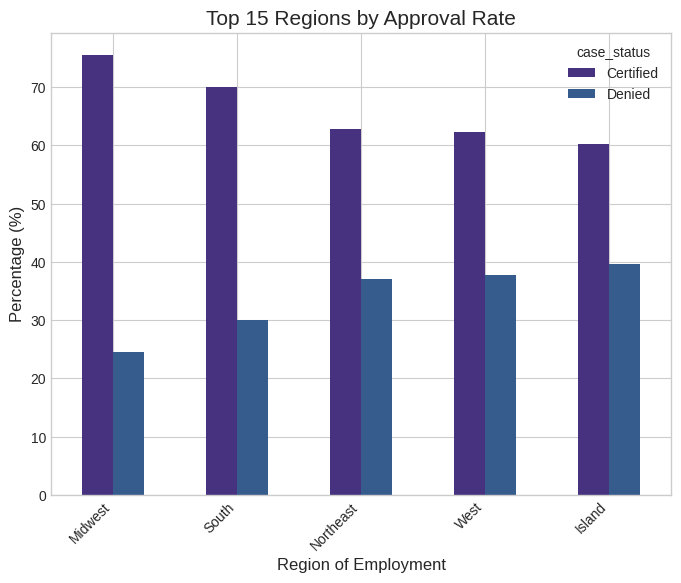

In [ ]:
# . Region of Employment Analysis
plt.figure(figsize=(8, 6))
region_status = pd.crosstab(df['region_of_employment'], df['case_status'])
region_status_pct = region_status.div(region_status.sum(axis=1), axis=0) * 100
# Access the 'CERTIFIED' column using its actual name
# Assuming the column name is 'CERTIFIED' based on the original code
# If the column name is different, replace 'CERTIFIED' with the correct name
ax = region_status_pct.sort_values(region_status_pct.columns[0], ascending=False).head(15).plot(kind='bar')
plt.title('Top 15 Regions by Approval Rate', fontsize=15)
plt.xlabel('Region of Employment', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig('region_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

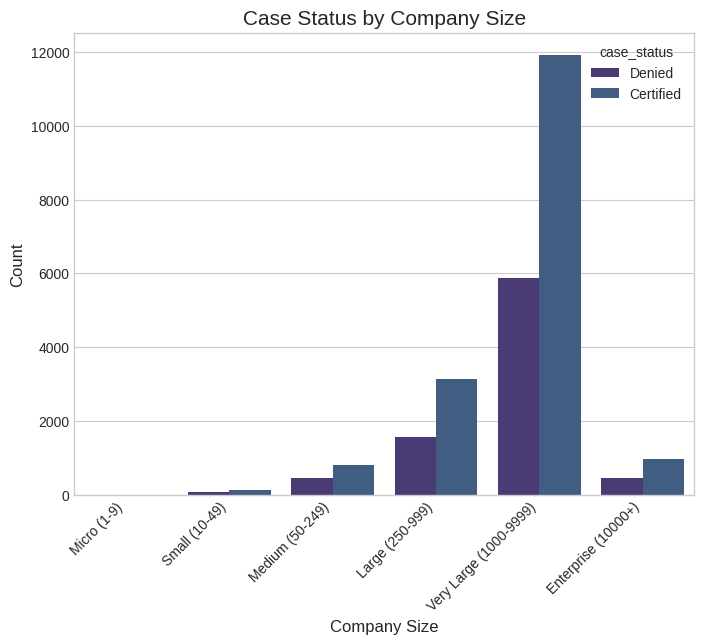

In [ ]:
#  Company Size Analysis
plt.figure(figsize=(8, 6))
# Create categories for number of employees
df['company_size_category'] = pd.cut(
    df['no_of_employees'],
    bins=[0, 10, 50, 250, 1000, 10000, float('inf')],
    labels=['Micro (1-9)', 'Small (10-49)', 'Medium (50-249)',
            'Large (250-999)', 'Very Large (1000-9999)', 'Enterprise (10000+)']
)
ax = sns.countplot(x='company_size_category', hue='case_status', data=df)
plt.title('Case Status by Company Size', fontsize=15)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig('company_size_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

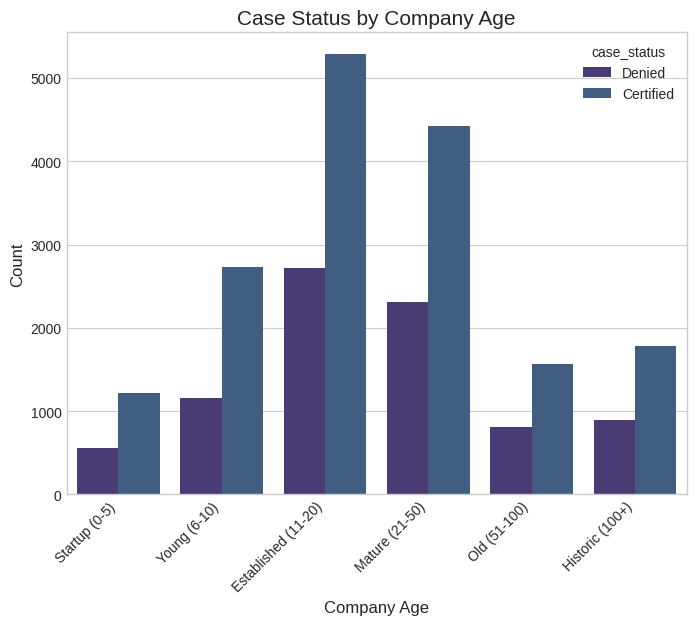

In [ ]:
#. Company Age Analysis
plt.figure(figsize=(8, 6))
# Create categories for company age
df['company_age_category'] = pd.cut(
    df['years_of_estab'],
    bins=[0, 5, 10, 20, 50, 100, float('inf')],
    labels=['Startup (0-5)', 'Young (6-10)', 'Established (11-20)',
            'Mature (21-50)', 'Old (51-100)', 'Historic (100+)']
)
sns.countplot(x='company_age_category', hue='case_status', data=df)
plt.title('Case Status by Company Age', fontsize=15)
plt.xlabel('Company Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig('company_age_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


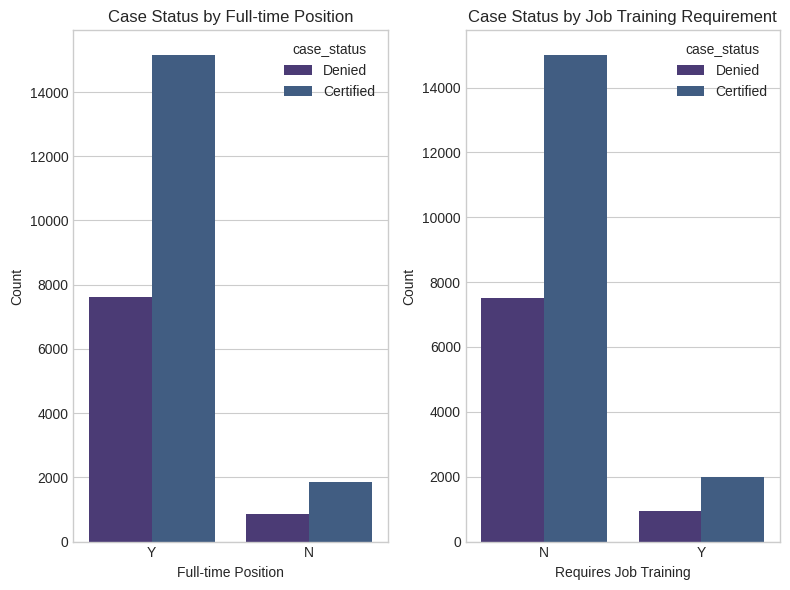

In [ ]:
#  Full-time Position and Job Training Requirements
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
sns.countplot(x='full_time_position', hue='case_status', data=df, ax=axes[0])
axes[0].set_title('Case Status by Full-time Position', fontsize=12)
axes[0].set_xlabel('Full-time Position', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)

sns.countplot(x='requires_job_training', hue='case_status', data=df, ax=axes[1])
axes[1].set_title('Case Status by Job Training Requirement', fontsize=12)
axes[1].set_xlabel('Requires Job Training', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)
plt.tight_layout()
plt.savefig('job_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 900x700 with 0 Axes>

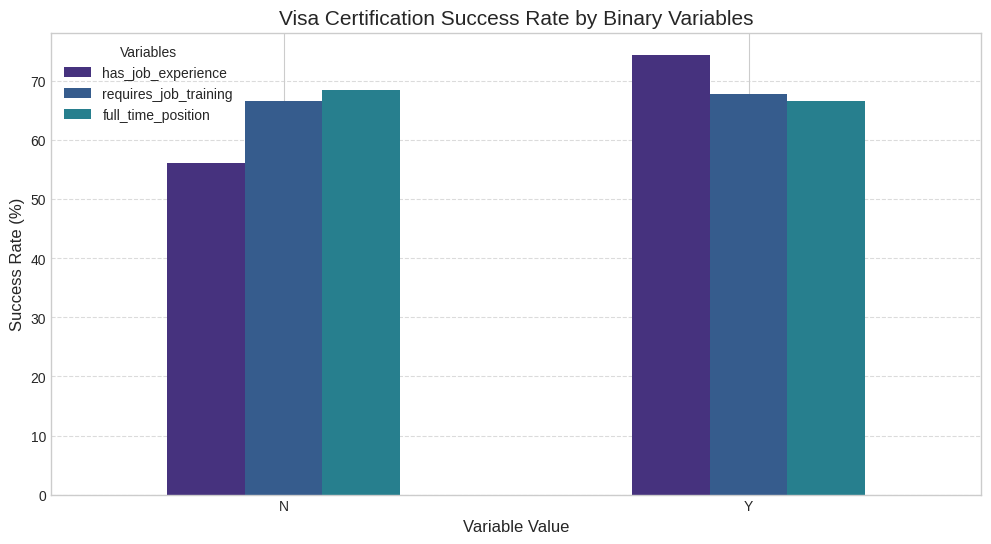

In [ ]:
# . Case Status Success Rate by Binary Variables
plt.figure(figsize=(9, 7))
binary_vars = ['has_job_experience', 'requires_job_training', 'full_time_position']
success_rates = {}

for var in binary_vars:
    cross_tab = pd.crosstab(df[var], df['case_status'])
    # Access the 'Certified' column using its actual name (case-sensitive)
    success_rate = cross_tab['Certified'] / cross_tab.sum(axis=1) * 100
    success_rates[var] = success_rate

success_df = pd.DataFrame(success_rates)
success_df.plot(kind='bar', figsize=(12, 6))
plt.title('Visa Certification Success Rate by Binary Variables', fontsize=15)
plt.xlabel('Variable Value', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Variables')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('binary_success_rates.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# # Correlation Matrix for Numerical Variables
# plt.figure(figsize=(10, 8))
# # Select numerical columns
# numerical_cols = df.select_dtypes(include=[np.number]).columns
# correlation = df[numerical_cols].corr()
# mask = np.triu(np.ones_like(correlation, dtype=bool))
# sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
#             linewidths=0.5, vmin=-1, vmax=1)
# plt.title('Correlation Matrix of Numerical Variables', fontsize=15)
# plt.tight_layout()
# plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
# plt.show()

# Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  object  
 1   continent              25480 non-null  object  
 2   education_of_employee  25480 non-null  object  
 3   has_job_experience     25480 non-null  object  
 4   requires_job_training  25480 non-null  object  
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  object  
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  object  
 10  full_time_position     25480 non-null  object  
 11  case_status            25480 non-null  object  
 12  years_of_estab         25480 non-null  int64   
 13  company_size_category  25447 non-null  category
 14  company_age_category   25457 non-null 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Identify categorical columns
categorical_cols = ['continent', 'education_of_employee', 'has_job_experience',
                   'requires_job_training', 'region_of_employment',
                   'unit_of_wage', 'full_time_position', 'case_status']

# Apply Label Encoding
label_encoder = LabelEncoder()
df_label_encoded = df.copy()

# Create a dictionary to store the mapping information
encoding_mappings = {}

for col in categorical_cols:
    # Fit and transform the data
    df_label_encoded[col + '_encoded'] = label_encoder.fit_transform(df[col])

    # Store the mapping for reference
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    encoding_mappings[col] = mapping

    # Remove the original categorical column
    df_label_encoded = df_label_encoded.drop(col, axis=1)

# Display the first few rows of the encoded dataframe
print("First 5 rows of label encoded dataframe:")
print(df_label_encoded.head())

# Save the encoding mappings for future reference
print("\nEncoding mappings (for reference):")
for col, mapping in encoding_mappings.items():
    print(f"\n{col} mapping:")
    for category, code in mapping.items():
        print(f"  {category} → {code}")



# Print the shape of the final dataset
print(f"\nFinal dataset shape: {df_label_encoded.shape}")

# Verify that all categorical columns were replaced with encoded versions
remaining_cols = df_label_encoded.columns
print("\nColumns in the final dataset:")
print(remaining_cols.tolist())

First 5 rows of label encoded dataframe:
  case_id  no_of_employees  yr_of_estab  prevailing_wage  years_of_estab  \
0  EZYV01            14513         2007         592.2029               9   
1  EZYV02             2412         2002       83425.6500              14   
2  EZYV03            44444         2008      122996.8600               8   
3  EZYV04               98         1897       83434.0300             119   
4  EZYV05             1082         2005      149907.3900              11   

    company_size_category company_age_category  continent_encoded  \
0     Enterprise (10000+)         Young (6-10)                  1   
1  Very Large (1000-9999)  Established (11-20)                  1   
2     Enterprise (10000+)         Young (6-10)                  1   
3         Medium (50-249)      Historic (100+)                  1   
4  Very Large (1000-9999)  Established (11-20)                  0   

   education_of_employee_encoded  has_job_experience_encoded  \
0                      

In [ ]:
df_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   case_id                        25480 non-null  object  
 1   no_of_employees                25480 non-null  int64   
 2   yr_of_estab                    25480 non-null  int64   
 3   prevailing_wage                25480 non-null  float64 
 4   years_of_estab                 25480 non-null  int64   
 5   company_size_category          25447 non-null  category
 6   company_age_category           25457 non-null  category
 7   continent_encoded              25480 non-null  int64   
 8   education_of_employee_encoded  25480 non-null  int64   
 9   has_job_experience_encoded     25480 non-null  int64   
 10  requires_job_training_encoded  25480 non-null  int64   
 11  region_of_employment_encoded   25480 non-null  int64   
 12  unit_of_wage_encoded           2

In [ ]:
# List of variables to remove (you can modify this list as needed)
variables_to_remove = [
    'case_id', 'company_size_category','company_age_category'
]

# Remove the specified variables
df_final = df_label_encoded.drop(variables_to_remove, axis=1)
df_final.head()

,no_of_employees,yr_of_estab,prevailing_wage,years_of_estab,continent_encoded,education_of_employee_encoded,has_job_experience_encoded,requires_job_training_encoded,region_of_employment_encoded,unit_of_wage_encoded,full_time_position_encoded,case_status_encoded
0,14513,2007,592.2029,9,1,2,0,0,4,0,1,1
1,2412,2002,83425.6500,14,1,3,1,0,2,3,1,0
2,44444,2008,122996.8600,8,1,0,0,1,4,3,1,1
3,98,1897,83434.0300,119,1,0,0,0,4,3,1,1
4,1082,2005,149907.3900,11,0,3,1,0,3,3,1,0


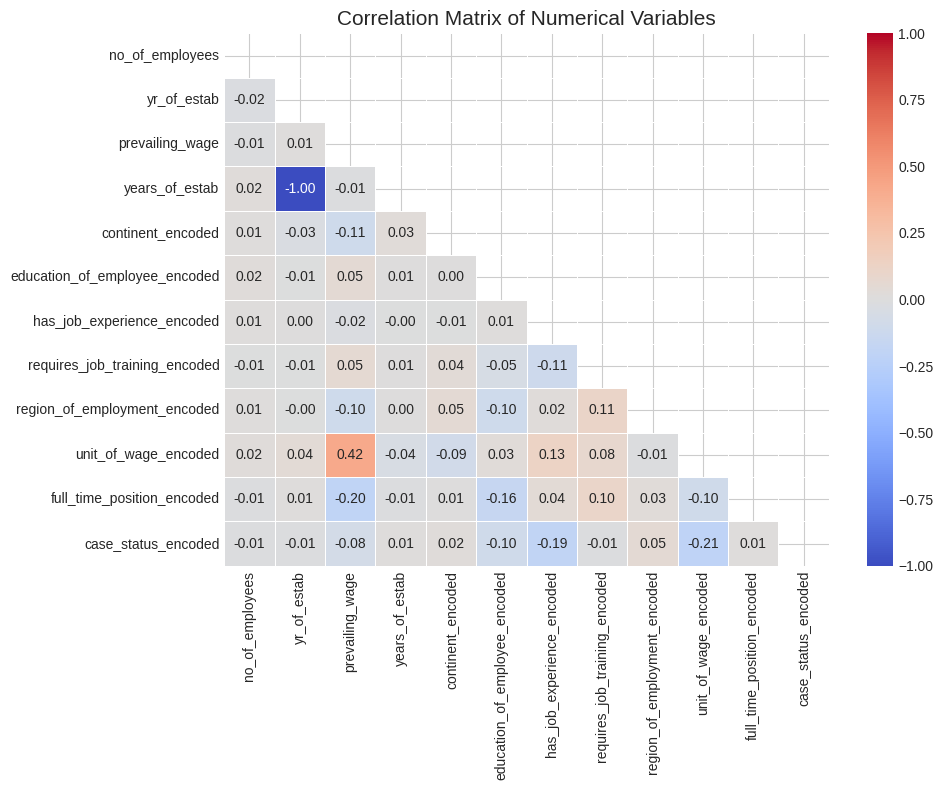

In [ ]:
# Correlation Matrix for Numerical Variables
plt.figure(figsize=(10, 8))
# Select numerical columns
numerical_cols = df_final.select_dtypes(include=[np.number]).columns
correlation = df_final[numerical_cols].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables', fontsize=15)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## RFE method for Feature Engineering

Starting feature selection with 11 features
Features: 1, CV Accuracy: 0.5710 ± 0.0046
Features: 2, CV Accuracy: 0.6305 ± 0.0024
Features: 3, CV Accuracy: 0.6447 ± 0.0054
Features: 4, CV Accuracy: 0.6858 ± 0.0360
Features: 5, CV Accuracy: 0.6819 ± 0.0375
Features: 6, CV Accuracy: 0.6821 ± 0.0348
Features: 7, CV Accuracy: 0.6893 ± 0.0357
Features: 8, CV Accuracy: 0.6996 ± 0.0360
Features: 9, CV Accuracy: 0.7004 ± 0.0356
Features: 10, CV Accuracy: 0.7028 ± 0.0345
Features: 11, CV Accuracy: 0.7053 ± 0.0362


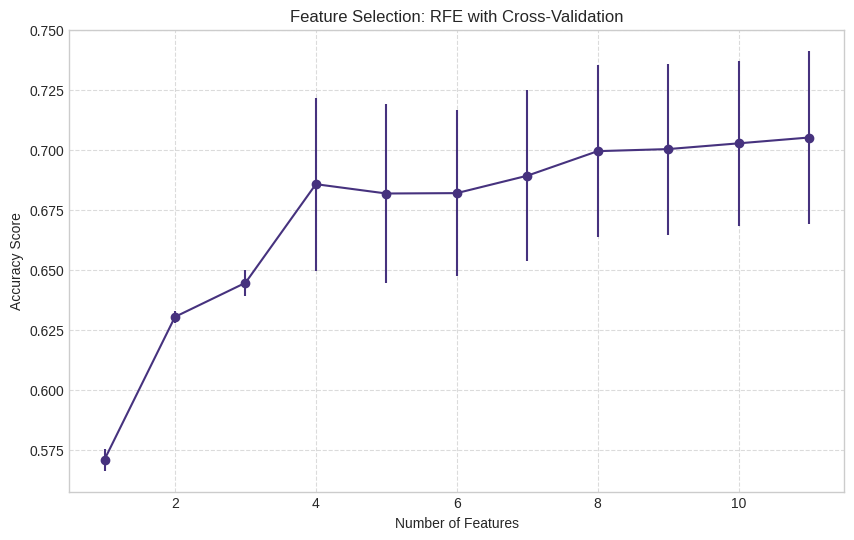


Optimal number of features: 11

Selected features:
  1. no_of_employees
  2. yr_of_estab
  3. prevailing_wage
  4. years_of_estab
  5. continent_encoded
  6. education_of_employee_encoded
  7. has_job_experience_encoded
  8. requires_job_training_encoded
  9. region_of_employment_encoded
  10. unit_of_wage_encoded
  11. full_time_position_encoded

All features with their rankings:
                          Feature  Selected  Rank
0                 no_of_employees      True     1
1                     yr_of_estab      True     1
2                 prevailing_wage      True     1
3                  years_of_estab      True     1
4               continent_encoded      True     1
5   education_of_employee_encoded      True     1
6      has_job_experience_encoded      True     1
7   requires_job_training_encoded      True     1
8    region_of_employment_encoded      True     1
9            unit_of_wage_encoded      True     1
10     full_time_position_encoded      True     1

Dataset with 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Separate features and target
# Assuming 'case_status_encoded' is your target variable
X = df_final.drop('case_status_encoded', axis=1) if 'case_status_encoded' in df_final.columns else df_final.iloc[:, :-1]
y = df_final['case_status_encoded'] if 'case_status_encoded' in df_final.columns else df_final.iloc[:, -1]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Starting feature selection with {X.shape[1]} features")

# Initialize base model for feature selection
# You can change the model according to your needs
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Alternative models:
# base_model = LogisticRegression(max_iter=1000, random_state=42)
# base_model = SVC(kernel='linear', random_state=42)

# Function to evaluate different numbers of features
def evaluate_feature_count(X, y, model, min_features=1):
    n_features = X.shape[1]
    feature_counts = range(min_features, n_features + 1, max(1, n_features // 10))  # Evaluate ~10 different feature counts
    cv_scores = []

    for n in feature_counts:
        # Create RFE with n features
        rfe = RFE(estimator=model, n_features_to_select=n)
        X_rfe = rfe.fit_transform(X, y)

        # Evaluate with cross-validation
        scores = cross_val_score(model, X_rfe, y, cv=5, scoring='accuracy')
        cv_scores.append((n, scores.mean(), scores.std()))
        print(f"Features: {n}, CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

    return feature_counts, cv_scores

# Evaluate different feature counts
feature_counts, cv_results = evaluate_feature_count(X_scaled, y, base_model)

# Plot results
counts = [x for x, _, _ in cv_results]
means = [y for _, y, _ in cv_results]
stds = [z for _, _, z in cv_results]

plt.figure(figsize=(10, 6))
plt.errorbar(counts, means, yerr=stds, fmt='-o')
plt.title('Feature Selection: RFE with Cross-Validation')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('rfe_feature_selection.png')
plt.show()

# Determine optimal number of features
optimal_features_idx = np.argmax(means)
optimal_features_count = counts[optimal_features_idx]
print(f"\nOptimal number of features: {optimal_features_count}")

# Apply RFE with optimal number of features
final_rfe = RFE(estimator=base_model, n_features_to_select=optimal_features_count)
final_rfe.fit(X_scaled, y)

# Get selected feature names
feature_names = X.columns
selected_features = feature_names[final_rfe.support_]
feature_ranks = final_rfe.ranking_

print("\nSelected features:")
for i, feature in enumerate(selected_features):
    print(f"  {i+1}. {feature}")

# Create a dataframe showing all features with their rankings
feature_ranking_df = pd.DataFrame({
    'Feature': feature_names,
    'Selected': final_rfe.support_,
    'Rank': final_rfe.ranking_
})
feature_ranking_df = feature_ranking_df.sort_values('Rank')
print("\nAll features with their rankings:")
print(feature_ranking_df)

# Create dataset with only selected features
X_selected = X[selected_features]
df_selected = pd.concat([X_selected, y], axis=1)


print(f"\nDataset with {optimal_features_count} selected features saved as 'olfcdata_rfe_selected.csv'")

# Optional: Evaluate final model with selected features
final_scores = cross_val_score(base_model, X_selected, y, cv=5, scoring='accuracy')
print(f"\nFinal model accuracy with {optimal_features_count} selected features: "
      f"{final_scores.mean():.4f} ± {final_scores.std():.4f}")

# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,           # 20% for testing
    train_size=0.8,          # 80% for training
    random_state=42,         # For reproducibility
    stratify=y               # Maintains the same class distribution in train and test sets
)

# Print the shapes to confirm the split
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (20384, 11), (20384,)
Testing set shape: (5096, 11), (5096,)


# Phase 2: Model Development

# Classical ML models

3 classical  ML algorithms;  namely  as Logistic Regression, Decision Trees, xgboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import xgboost as xgb


# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to print results
def print_results(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name} Results:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    # Classification report with 4 digit precision
    report = classification_report(y_true, y_pred, digits=4)
    print("\nClassification Report:")
    print(report)

# 1. Decision Tree with Hyperparameter Tuning
print("Training Decision Tree with GridSearchCV...")
dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

dt_grid.fit(X_train_scaled, y_train)
dt_best = dt_grid.best_estimator_

# Best parameters
print("\nDecision Tree Best Parameters:")
for param, value in dt_grid.best_params_.items():
    print(f"{param}: {value}")

# Predictions
dt_y_pred = dt_best.predict(X_test_scaled)
print_results("Decision Tree", y_test, dt_y_pred)

# 2. Logistic Regression with Hyperparameter Tuning
print("\nTraining Logistic Regression with GridSearchCV...")
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [1000]
}

lr_grid = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=lr_param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

lr_grid.fit(X_train_scaled, y_train)
lr_best = lr_grid.best_estimator_

# Best parameters
print("\nLogistic Regression Best Parameters:")
for param, value in lr_grid.best_params_.items():
    print(f"{param}: {value}")

# Predictions
lr_y_pred = lr_best.predict(X_test_scaled)
print_results("Logistic Regression", y_test, lr_y_pred)

# 3. XGBoost with Hyperparameter Tuning
print("\nTraining XGBoost with GridSearchCV...")
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=xgb_param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

xgb_grid.fit(X_train_scaled, y_train)
xgb_best = xgb_grid.best_estimator_

# Best parameters
print("\nXGBoost Best Parameters:")
for param, value in xgb_grid.best_params_.items():
    print(f"{param}: {value}")

# Predictions
xgb_y_pred = xgb_best.predict(X_test_scaled)
print_results("XGBoost", y_test, xgb_y_pred)

# Compare all models
models = ["Decision Tree", "Logistic Regression", "XGBoost"]
accuracies = [
    accuracy_score(y_test, dt_y_pred),
    accuracy_score(y_test, lr_y_pred),
    accuracy_score(y_test, xgb_y_pred)
]

precisions = [
    precision_score(y_test, dt_y_pred, average='weighted'),
    precision_score(y_test, lr_y_pred, average='weighted'),
    precision_score(y_test, xgb_y_pred, average='weighted')
]

recalls = [
    recall_score(y_test, dt_y_pred, average='weighted'),
    recall_score(y_test, lr_y_pred, average='weighted'),
    recall_score(y_test, xgb_y_pred, average='weighted')
]

f1_scores = [
    f1_score(y_test, dt_y_pred, average='weighted'),
    f1_score(y_test, lr_y_pred, average='weighted'),
    f1_score(y_test, xgb_y_pred, average='weighted')
]

comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': [f"{acc:.4f}" for acc in accuracies],
    'Precision': [f"{prec:.4f}" for prec in precisions],
    'Recall': [f"{rec:.4f}" for rec in recalls],
    'F1 Score': [f"{f1:.4f}" for f1 in f1_scores]
})

print("\nModel Comparison:")
print(comparison_df)

# Find the best model
best_model_index = np.argmax(f1_scores)
print(f"\nBest Model: {models[best_model_index]} with F1 Score: {f1_scores[best_model_index]:.4f}")

Training Decision Tree with GridSearchCV...

Decision Tree Best Parameters:
criterion: entropy
max_depth: 10
min_samples_leaf: 2
min_samples_split: 5

Decision Tree Results:
Accuracy:  0.7294
Precision: 0.7206
Recall:    0.7294
F1 Score:  0.7227

Classification Report:
              precision    recall  f1-score   support

           0     0.7754    0.8375    0.8053      3404
           1     0.6103    0.5118    0.5567      1692

    accuracy                         0.7294      5096
   macro avg     0.6928    0.6747    0.6810      5096
weighted avg     0.7206    0.7294    0.7227      5096


Training Logistic Regression with GridSearchCV...

Logistic Regression Best Parameters:
C: 1
max_iter: 1000
penalty: l2
solver: lbfgs

Logistic Regression Results:
Accuracy:  0.6949
Precision: 0.6842
Recall:    0.6949
F1 Score:  0.6291

Classification Report:
              precision    recall  f1-score   support

           0     0.6986    0.9553    0.8070      3404
           1     0.6553    0.1708

**Neural Network based Model  (LSTM)**

In [ ]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.utils import shuffle
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# Assuming 'case_status_encoded' is your target variable
X = df_final.drop('case_status_encoded', axis=1).values
y = df_final['case_status_encoded'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM [samples, time steps, features]
# For non-sequential data, we use time_steps=1
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Split the data (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, random_state=42, stratify=y
)

# Function to build model with hyperparameters
def build_model(hp):
    model = Sequential()

    # LSTM layers
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=32),
        activation=hp.Choice('activation', values=['tanh', 'relu']),
        return_sequences=hp.Boolean('return_sequences'),
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))

    #  second LSTM layer
    if hp.Boolean('second_lstm_layer'):
        model.add(LSTM(
            units=hp.Int('units_2', min_value=16, max_value=64, step=16),
            activation=hp.Choice('activation_2', values=['tanh', 'relu'])
        ))

    # Dropout for regularization
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer - adjust units based on your classification task
    # For binary classification:
    model.add(Dense(1, activation='sigmoid'))


    # Compile model
    model.compile(
        optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
        metrics=['accuracy', Precision(), Recall()]
    )

    return model

# Hyperparameter tuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Adjust based on your computational resources
    executions_per_trial=2,
    directory='lstm_tuning',
    project_name='visa_classification'
)

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Search for best hyperparameters
tuner.search(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Get best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Hyperparameters:")
for param, value in best_hps.values.items():
    print(f"{param}: {value}")

# Build model with best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train best model
history = best_model.fit(
    X_train, y_train,
    epochs=20,  # This can be larger as we have early stopping
    batch_size=32, # Changed from best_hps.get('batch_size', 32) to 32
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate model
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # For binary classification

# Print metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Classification report with 4 digits
report = classification_report(y_test, y_pred, digits=4)
print("\nClassification Report:")
print(report)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Save the model
best_model.save('lstm_visa_classification_model.h5')
print("\nModel saved as 'lstm_visa_classification_model.h5'")

Reloading Tuner from lstm_tuning/visa_classification/tuner0.json

Best Hyperparameters:
units: 128
activation: tanh
return_sequences: True
second_lstm_layer: True
dropout: 0.1
learning_rate: 0.006805387698117665
units_2: 64
activation_2: relu
Epoch 1/20
510/510 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6965 - loss: 0.6015 - precision_2: 0.6661 - recall_2: 0.1714 - val_accuracy: 0.6959 - val_loss: 0.5703 - val_precision_2: 0.6036 - val_recall_2: 0.2687
Epoch 2/20
510/510 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7209 - loss: 0.5537 - precision_2: 0.6700 - recall_2: 0.3147 - val_accuracy: 0.7285 - val_loss: 0.5459 - val_precision_2: 0.6286 - val_recall_2: 0.4634
Epoch 3/20
510/510 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7376 - loss: 0.5363 - precision_2: 0.6524 - recall_2: 0.4470 - val_accuracy: 0.7344 - val_loss: 0.5378 - val_precision_2: 0.6336 - val_recall_2: 0.4912
Epoch 4/20
510/510 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7425 - loss: 0.5299 - precision_2: 0.


Test Accuracy: 0.7386

Classification Report:
              precision    recall  f1-score   support

           0     0.7681    0.8719    0.8167      3404
           1     0.6461    0.4704    0.5445      1692

    accuracy                         0.7386      5096
   macro avg     0.7071    0.6712    0.6806      5096
weighted avg     0.7276    0.7386    0.7263      5096

F1 Score: 0.7263

Model saved as 'lstm_visa_classification_model.h5'


Model saved as 'xgboost_visa_model.joblib'
Model saved as 'xgboost_visa_model.pkl'
Scaler saved as 'feature_scaler.joblib'
Feature names saved as 'feature_names.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

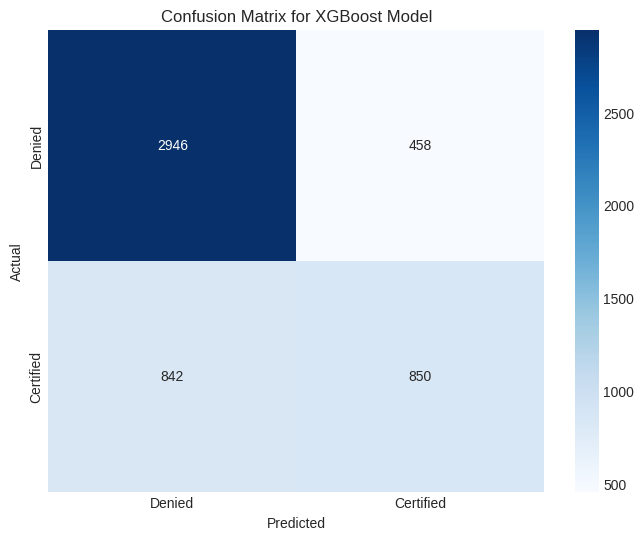

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1200x800 with 0 Axes>

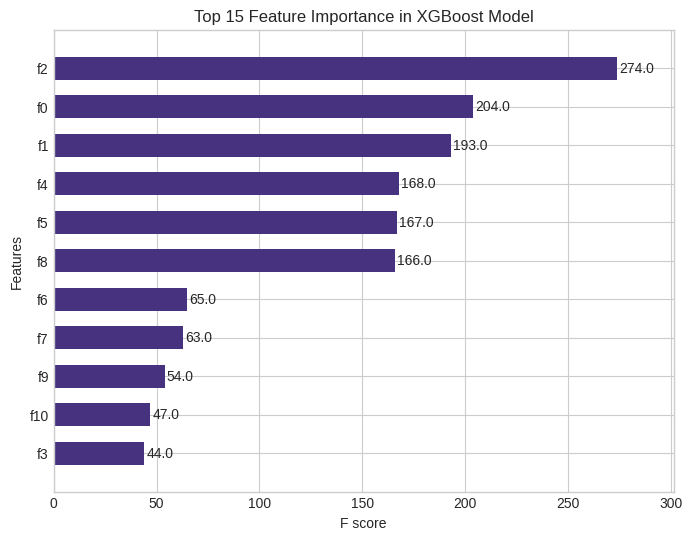

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import joblib
from google.colab import files

# Assuming you have your best XGBoost model in 'xgb_best'
# If not, recreate it with the best parameters
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 50,
    'subsample': 1.0
}

# Recreate the model with best parameters
xgb_model = xgb.XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model (assuming X_train_scaled and y_train are defined)
# If not defined, load your data and create them
xgb_model.fit(X_train_scaled, y_train)

# 1. Model Serialization
# Save using joblib (better for large models)
joblib.dump(xgb_model, 'xgboost_visa_model.joblib')
print("Model saved as 'xgboost_visa_model.joblib'")

# Save using pickle (alternative method)
with open('xgboost_visa_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)
print("Model saved as 'xgboost_visa_model.pkl'")

# Save the feature scaler for preprocessing new data
joblib.dump(scaler, 'feature_scaler.joblib')
print("Scaler saved as 'feature_scaler.joblib'")

# Also save feature names for reference
feature_names = df_final.drop('case_status_encoded', axis=1).columns.tolist()  # Get feature names from the original DataFrame
with open('feature_names.pkl', 'wb') as file:
    pickle.dump(feature_names, file)
print("Feature names saved as 'feature_names.pkl'")


# Download the files to your local machine (when running in Colab)
files.download('xgboost_visa_model.joblib')
files.download('xgboost_visa_model.pkl')
files.download('feature_scaler.joblib')
files.download('feature_names.pkl')

# 2. Visualize confusion matrix
y_pred = xgb_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Denied', 'Certified'],
            yticklabels=['Denied', 'Certified'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Model')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('confusion_matrix.png')

# 3. Original feature mapping
feature_mapping = {
    'continent_encoded': 'continent',
    'education_of_employee_encoded': 'education_of_employee',
    'has_job_experience_encoded': 'has_job_experience',
    'requires_job_training_encoded': 'requires_job_training',
    'region_of_employment_encoded': 'region_of_employment',
    'unit_of_wage_encoded': 'unit_of_wage',
    'full_time_position_encoded': 'full_time_position',
    'no_of_employees': 'no_of_employees',
    'yr_of_estab': 'yr_of_estab',
    'years_of_estab': 'years_of_estab (derived)',
    'prevailing_wage': 'prevailing_wage'
}

# 4. Standard feature importance plot
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_model, max_num_features=15, height=0.6)
plt.title('Top 15 Feature Importance in XGBoost Model')
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('feature_importance.png')

# 5. Enhanced feature importance plot with original names
# Get feature importance scores
importance = xgb_model.feature_importances_
indices = np.argsort(importance)[::-1]

# Get feature names from X_train
feature_names = X_train.columns.tolist()

# Create dataframe for visualization
importance_df = pd.DataFrame({
    'Feature': [feature_names[i] for i in indices[:15]],
    'Importance': importance[indices[:15]]
})

# Add original feature names
importance_df['Original_Feature'] = importance_df['Feature'].map(
    lambda x: feature_mapping.get(x, x)
)

# Create enhanced feature importance plot
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 15 Feature Importance with Original Names', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Add the original feature names as annotations
for i, row in enumerate(importance_df.itertuples()):
    ax.text(row.Importance + 0.01, i, f"({row.Original_Feature})", va='center', fontsize=10)

plt.tight_layout()
plt.savefig('feature_importance_with_names.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('feature_importance_with_names.png')

# 6. Print and save feature importance table
print("\nFeature Importance Ranking:")
importance_df['Importance_Score'] = importance_df['Importance'].apply(lambda x: f"{x:.4f}")
importance_table = importance_df[['Feature', 'Original_Feature', 'Importance_Score']]
importance_table.index = np.arange(1, len(importance_table) + 1)
print(importance_table)



Model saved as 'xgboost_visa_model.joblib'
Model saved as 'xgboost_visa_model.pkl'
Scaler saved as 'feature_scaler.joblib'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

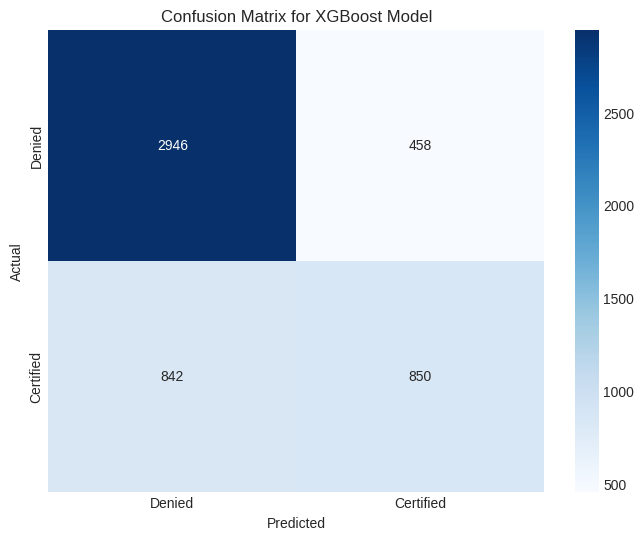

<Figure size 1200x800 with 0 Axes>

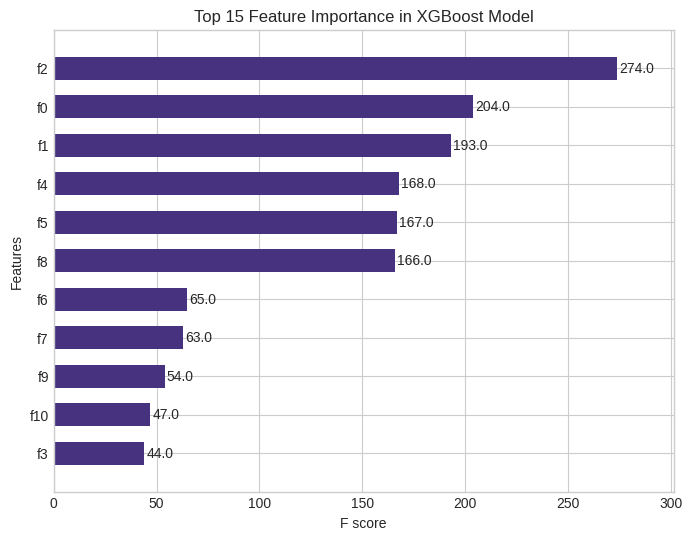

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import joblib
from google.colab import files

# Assuming you have your best XGBoost model in 'xgb_best'
# If not, recreate it with the best parameters
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 50,
    'subsample': 1.0
}

# Recreate the model with best parameters
xgb_model = xgb.XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model (assuming X_train_scaled and y_train are defined)
# If not defined, load your data and create them
xgb_model.fit(X_train_scaled, y_train)

# 1. Model Serialization
# Save using joblib (better for large models)
joblib.dump(xgb_model, 'xgboost_visa_model.joblib')
print("Model saved as 'xgboost_visa_model.joblib'")

# Save using pickle (alternative method)
with open('xgboost_visa_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)
print("Model saved as 'xgboost_visa_model.pkl'")

# Save the feature scaler for preprocessing new data
joblib.dump(scaler, 'feature_scaler.joblib')
print("Scaler saved as 'feature_scaler.joblib'")

# Download the files to your local machine (when running in Colab)
files.download('xgboost_visa_model.joblib')
files.download('xgboost_visa_model.pkl')
files.download('feature_scaler.joblib')

# 2. Visualize confusion matrix
y_pred = xgb_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Denied', 'Certified'],
            yticklabels=['Denied', 'Certified'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Model')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Feature Importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_model, max_num_features=15, height=0.6)
plt.title('Top 15 Feature Importance in XGBoost Model')
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:

# 4. Create a Flask API skeleton for deployment
flask_code = '''
from flask import Flask, request, jsonify
import joblib
import numpy as np
import pandas as pd

app = Flask(__name__)

# Load the model and scaler
model = joblib.load('xgboost_visa_model.joblib')
scaler = joblib.load('feature_scaler.joblib')

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from POST request
    data = request.json

    # Convert to DataFrame
    df = pd.DataFrame(data, index=[0])

    # Preprocess the data
    # Replace with your actual feature names
    feature_cols = [col for col in df.columns]

    # Scale the features
    scaled_features = scaler.transform(df[feature_cols])

    # Make prediction
    prediction = model.predict(scaled_features)
    probability = model.predict_proba(scaled_features)

    # Create response
    result = {
        'prediction': int(prediction[0]),
        'prediction_label': 'Certified' if prediction[0] == 1 else 'Denied',
        'probability': float(probability[0][1])
    }

    return jsonify(result)

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)
'''

# Save the Flask API code
with open('app.py', 'w') as f:
    f.write(flask_code)
print("Flask API code saved as 'app.py'")

# 5. Create a Dockerfile for containerization
dockerfile = '''
FROM python:3.9-slim

WORKDIR /app

COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

COPY app.py .
COPY xgboost_visa_model.joblib .
COPY feature_scaler.joblib .

EXPOSE 5000

CMD ["python", "app.py"]
'''

# Save the Dockerfile
with open('Dockerfile', 'w') as f:
    f.write(dockerfile)
print("Dockerfile created")

# 6. Create requirements.txt
requirements = '''
flask==2.0.1
joblib==1.1.0
numpy==1.21.2
pandas==1.3.3
scikit-learn==1.0
xgboost==1.5.0
gunicorn==20.1.0
'''

# Save requirements.txt
with open('requirements.txt', 'w') as f:
    f.write(requirements)
print("requirements.txt created")

# 7. Create a script for MLflow tracking
mlflow_code = '''
import mlflow
import mlflow.xgboost
import xgboost as xgb
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the model
model = joblib.load('xgboost_visa_model.joblib')

# Start MLflow tracking
mlflow.start_run(run_name="xgboost_visa_model")

# Log parameters
for param, value in model.get_params().items():
    mlflow.log_param(param, value)

# Log model
mlflow.xgboost.log_model(model, "xgboost_model")

# Log metrics (assuming you have X_test and y_test loaded)
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]

mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
mlflow.log_metric("precision", precision_score(y_test, y_pred, average='weighted'))
mlflow.log_metric("recall", recall_score(y_test, y_pred, average='weighted'))
mlflow.log_metric("f1_score", f1_score(y_test, y_pred, average='weighted'))
mlflow.log_metric("roc_auc", roc_auc_score(y_test, y_pred_proba))

# End the run
mlflow.end_run()
'''

# Save the MLflow tracking code
with open('mlflow_tracking.py', 'w') as f:
    f.write(mlflow_code)
print("MLflow tracking code saved as 'mlflow_tracking.py'")

# 8. Create a README.md with deployment instructions
readme = '''
# Visa Application Prediction Model

This repository contains a machine learning model to predict visa application outcomes (Certified vs. Denied).

## Model Performance

- Accuracy: 0.7449
- Precision: 0.7353
- Recall: 0.7449
- F1 Score: 0.7354

## Deployment Instructions

### Local Deployment

1. Clone this repository
2. Install dependencies: `pip install -r requirements.txt`
3. Run the Flask app: `python app.py`
4. Access the API at: `http://localhost:5000/predict`

### Docker Deployment

1. Build the Docker image: `docker build -t visa-prediction-app .`
2. Run the container: `docker run -p 5000:5000 visa-prediction-app`
3. Access the API at: `http://localhost:5000/predict`

### API Usage

Send a POST request to `/predict` with the feature values in JSON format.

Example: